In [ ]:
import numpy as np
import pickle # not necessary 
import cv2 # Computer vision to convert image to array
from os import listdir  

In [ ]:
# Please make sure to google below subjects
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D# what is max pooling ?
from keras.layers.core import Activation, Flatten, Dropout, Dense #why dropout ? #its used in avaoiding overfitting 
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import tensorflow #backend

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt # try using plotly for better understnding

In [ ]:
#You should store dataset in ''Final year project/Dataset'' or whichever name you wish

For below operation I am taking dataset from google drive please make sure that you have Dataset in your drive if you dont get this contact me.Run below cell to get authorisation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[click](https://datascience.stackexchange.com/questions/29480/uploading-images-folder-from-my-system-into-google-colab) to know how i arrived at this

In [ ]:
EPOCHS = 25
INIT_LR = 1e-3 #https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/drive/MyDrive/PATH_TO_OUTPUT'
width=256
height=256
depth=3

In [ ]:
!unzip -uq "/content/drive/MyDrive/Final Year Project/Dataset.zip" -d "/content/drive/My Drive/PATH_TO_OUTPUT"

In [ ]:
#Function to convert image into array 
#
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
#below code is for loading  the images
#Make sure to know the direcory root
# this is most important cell. There are different set of engineers who do this.
image_list, label_list = [], []
 
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)
 
    for plant_folder in root_dir : 
        plant_disease_folder_list = listdir(f'{directory_root}/{plant_folder}')
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)
 
        for plant_disease_folder in plant_disease_folder_list:
            print(f'[INFO] Processing {plant_disease_folder} ...')
            plant_disease_image_list = listdir(f'{directory_root}/{plant_folder}/{plant_disease_folder}/')
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)
 
            for image in plant_disease_image_list[:200]:
                image_directory = f'{directory_root}/{plant_folder}/{plant_disease_folder}/{image}'
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing train ...
[INFO] Processing val ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato_healthy ...
[INFO] Image loading completed


In [ ]:
print(label_list)

['Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato

In [ ]:
image_size = len(image_list)
label_binarizer = LabelBinarizer()# why ?
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb')) #not necessary
n_classes = len(label_binarizer.classes_) #
print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 225.0 # costimize and check as per discussion

['Tomato_Bacterial_spot' 'Tomato_Early_blight'
 'Tomato__Tomato_mosaic_virus' 'Tomato_healthy']


https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

[INFO] Spliting data to train, test


In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))

model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))#Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. 

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[INFO] training network...


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
20/20 [==============================] - 138s 7s/step - loss: 0.1088 - accuracy: 0.9494 - val_loss: 1.7555 - val_accuracy: 0.6187
Epoch 2/25
20/20 [==============================] - 136s 7s/step - loss: 0.0833 - accuracy: 0.9590 - val_loss: 3.8086 - val_accuracy: 0.3438
Epoch 3/25
20/20 [==============================] - 135s 7s/step - loss: 0.0632 - accuracy: 0.9638 - val_loss: 1.2978 - val_accuracy: 0.5250
Epoch 4/25
20/20 [==============================] - 135s 7s/step - loss: 0.0390 - accuracy: 0.9845 - val_loss: 1.5917 - val_accuracy: 0.5938
Epoch 5/25
20/20 [==============================] - 134s 7s/step - loss: 0.0504 - accuracy: 0.9647 - val_loss: 0.5609 - val_accuracy: 0.8000
Epoch 6/25
20/20 [==============================] - 135s 7s/step - loss: 0.0795 - accuracy: 0.9627 - val_loss: 1.0448 - val_accuracy: 0.6313
Epoch 7/25
20/20 [==============================] - 134s 7s/step - loss: 0.0639 - accuracy: 0.9695 - val_loss: 1.6108 - val_accuracy: 0.5813
Epoch 8/25
20

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

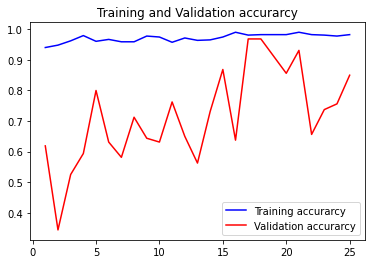

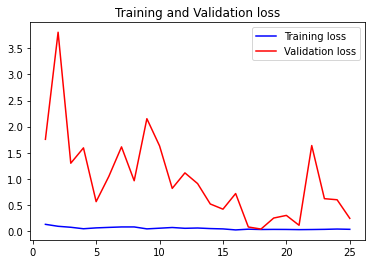

In [ ]:
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
5/5 [==============================] - 7s 1s/step - loss: 0.2407 - accuracy: 0.8500
Test Accuracy: 85.00000238418579


In [ ]:
model.save("model.h5")

[click](https://intellipaat.com/community/9487/how-to-predict-input-image-using-trained-model-in-keras) to know about how to make use of pre trained model to predict new images.

In [ ]:
from google.colab import files
from IPython import display

uploaded = files.upload()

Saving 00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG to 00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG


In [ ]:
from google.colab import files
from IPython import display

display.Image("00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG",
              width=1000)

In [ ]:
from keras.models import load_model

model = load_model('model.h5')

model.compile(loss='binary_crossentropy',

              optimizer=opt,

              metrics=['accuracy'])
im=convert_image_to_array("00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG")
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)
classes = model.predict_classes(npp_image)

print(classes)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3]


In [ ]:
itemindex = np.where(classes==np.max(classes))
print(itemindex)
print("probability:"+str(np.max(classes))+"\n"+label_binarizer.classes_[itemindex[0][0]])

(array([0]),)
probability:3
Tomato_Bacterial_spot


In [ ]:
itemindex = np.where(classes==np.max(classes))
print("probability:"+str(np.max(model.predict(npp_image))))
print(label_binarizer.classes_[classes])

In [ ]:

print(label_binarizer.classes_[classes])


['Tomato_healthy']
